In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
df = pd.read_csv("/content/evolucao_numero_ittc.csv", sep=";")

In [60]:
df_crescimento = df[["Homens", "Mulheres"]].diff().dropna()
df_crescimento = df_crescimento.reset_index()
df_crescimento = df_crescimento[["Homens", "Mulheres"]]
df_crescimento

,Homens,Mulheres
0,17.20,1.10
1,32.90,2.30
2,30.40,1.30
3,39.80,0.90
4,72.80,3.60
5,19.95,3.57
6,7.37,-3.14


In [61]:
anos = ["2010-2011", "2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017"]
anos = pd.DataFrame (anos, columns = ['Ano'])

In [62]:
dados = pd.concat([anos, df_crescimento], axis=1)
dados

,Ano,Homens,Mulheres
0,2010-2011,17.20,1.10
1,2011-2012,32.90,2.30
2,2012-2013,30.40,1.30
3,2013-2014,39.80,0.90
4,2014-2015,72.80,3.60
5,2015-2016,19.95,3.57
6,2016-2017,7.37,-3.14


In [66]:
df_homens = dados[["Ano", "Homens"]].melt(id_vars=["Ano"], value_vars=["Homens"])
df_mulheres = dados[["Ano", "Mulheres"]].melt(id_vars=["Ano"], value_vars=["Mulheres"])
df_homens

,Ano,variable,value
0,2010-2011,Homens,17.20
1,2011-2012,Homens,32.90
2,2012-2013,Homens,30.40
3,2013-2014,Homens,39.80
4,2014-2015,Homens,72.80
5,2015-2016,Homens,19.95
6,2016-2017,Homens,7.37


In [68]:
df_homens = df_homens.rename(columns={'variable': 'Gênero', 'value': 'Aumento pop. carc.'})
df_mulheres = df_mulheres.rename(columns={'variable': 'Gênero', 'value': 'Aumento pop. carc.'})
df_mulheres

,Ano,Gênero,Aumento pop. carc.
0,2010-2011,Mulheres,1.10
1,2011-2012,Mulheres,2.30
2,2012-2013,Mulheres,1.30
3,2013-2014,Mulheres,0.90
4,2014-2015,Mulheres,3.60
5,2015-2016,Mulheres,3.57
6,2016-2017,Mulheres,-3.14


In [69]:
anos_duplicados = pd.concat([anos, anos], axis = 0).reset_index()["Ano"]
base_de_dados = pd.concat([df_homens[["Gênero", "Aumento pop. carc."]], df_mulheres[["Gênero", "Aumento pop. carc."]]], axis=0).reset_index()[["Gênero", "Aumento pop. carc."]]
base_de_dados = pd.concat([anos_duplicados, base_de_dados], axis=1)

Text(-0.3, -15, 'Fonte: Infopen (2017)')

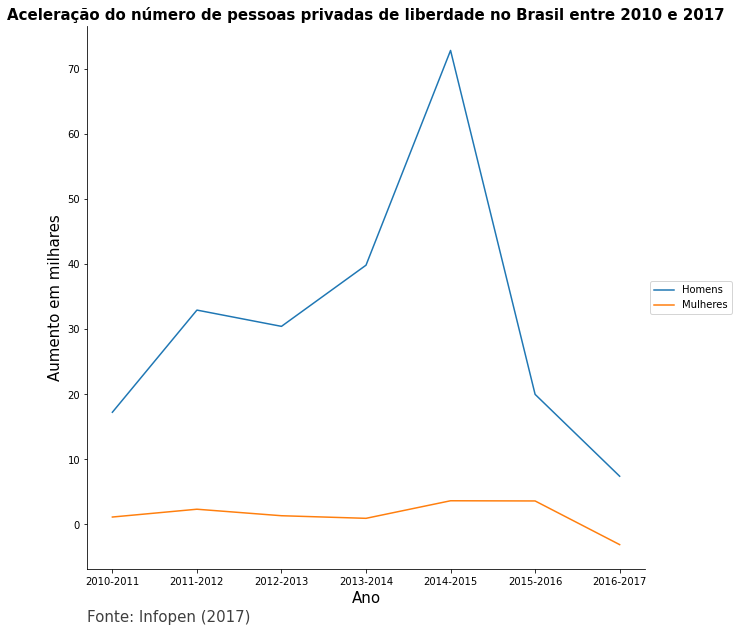

In [70]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x="Ano", y="Aumento pop. carc.", hue="Gênero", data=base_de_dados)
ax.set_title("Aceleração do número de pessoas privadas de liberdade no Brasil entre 2010 e 2017", fontsize=15,  weight='bold')
ax.set_ylabel("Aumento em milhares", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.text(x=-0.3, y=-15, s='Fonte: Infopen (2017)', fontsize=15, alpha=0.75)